In [127]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()


In [128]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [129]:
#dataset info



In [130]:
bc.target[0]

np.int64(0)

In [131]:
bc.target.shape

(569,)

In [132]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [133]:
bc.data.shape

(569, 30)

In [134]:
 #preprocessing

In [135]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(bc.data, bc.target,test_size=0.2)

In [136]:
print(f"feacure => train:{x_train.shape} - test:{x_test.shape}")
print(f"label=> train:{y_train.shape} - test: {y_test.shape}")

feacure => train:(455, 30) - test:(114, 30)
label=> train:(455,) - test: (114,)


In [137]:
x_train

array([[9.742e+00, 1.912e+01, 6.193e+01, ..., 4.589e-02, 3.196e-01,
        8.009e-02],
       [1.381e+01, 2.375e+01, 9.156e+01, ..., 2.013e-01, 4.432e-01,
        1.086e-01],
       [9.606e+00, 1.684e+01, 6.164e+01, ..., 8.120e-02, 2.982e-01,
        9.825e-02],
       ...,
       [1.334e+01, 1.586e+01, 8.649e+01, ..., 1.708e-01, 3.527e-01,
        1.016e-01],
       [1.344e+01, 2.158e+01, 8.618e+01, ..., 1.112e-01, 2.994e-01,
        7.146e-02],
       [1.095e+01, 2.135e+01, 7.190e+01, ..., 1.424e-01, 2.964e-01,
        9.606e-02]], shape=(455, 30))

In [138]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [139]:
x_train[0]

array([0.13508489, 0.37704918, 0.12675564, 0.06201485, 0.5959596 ,
       0.17820633, 0.02093252, 0.09776342, 0.73198078, 0.42818029,
       0.24019708, 0.42193014, 0.21113832, 0.06858076, 0.36192764,
       0.15318993, 0.01520455, 0.19928017, 0.32529408, 0.11505189,
       0.11668445, 0.28088356, 0.10647941, 0.04809772, 0.40220923,
       0.09059553, 0.01665335, 0.15769759, 0.32150601, 0.16430539])

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train,y_pred_test):
    acc_train = accuracy_score(y_true= y_train, y_pred= y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test,y_pred= y_pred_test)
    r = recall_score(y_true=y_test,y_pred=y_pred_test)

    print(f"acc_train: {acc_train} - acc_test: {acc_test} - percision: {p} - recall:{r}")

    return acc_train, acc_test,p,r

In [141]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [142]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train,y_pred_test)

acc_train: 0.945054945054945 - acc_test: 0.9035087719298246 - percision: 0.9066666666666666 - recall:0.9444444444444444


In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size= 28)

knn.fit(x_train,y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,28
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [144]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train,y_pred_test)

acc_train: 0.9802197802197802 - acc_test: 0.9649122807017544 - percision: 0.9473684210526315 - recall:1.0


In [145]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 64, min_samples_split=2, criterion ='gini')

dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,64
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [146]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train,y_pred_test)

acc_train: 1.0 - acc_test: 0.9298245614035088 - percision: 0.9324324324324325 - recall:0.9583333333333334


In [147]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=32, min_samples_split=4)

rf.fit(x_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,32
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [148]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train,y_pred_test)

acc_train: 1.0 - acc_test: 0.9473684210526315 - percision: 0.9342105263157895 - recall:0.9861111111111112


In [149]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [150]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train,y_pred_test)

acc_train: 0.9912087912087912 - acc_test: 0.9649122807017544 - percision: 0.9473684210526315 - recall:1.0


In [151]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train,y_pred_test)

acc_train: 0.978021978021978 - acc_test: 0.9473684210526315 - percision: 0.9342105263157895 - recall:0.9861111111111112


In [165]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=1028, activation='relu', solver="adam", batch_size =64)
ann.fit(x_train, y_train)

,hidden_layer_sizes,1028
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,64
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [166]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train,y_pred_test)

acc_train: 0.989010989010989 - acc_test: 0.956140350877193 - percision: 0.958904109589041 - recall:0.9722222222222222


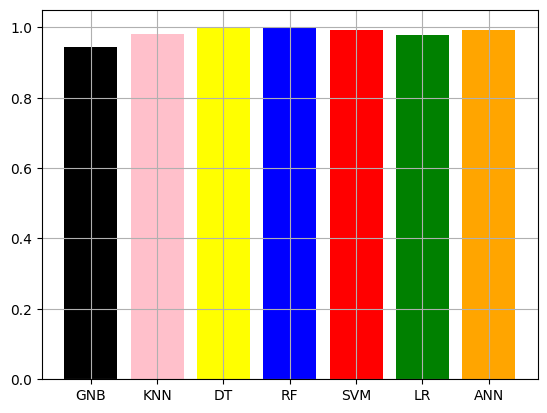

In [162]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr,acc_train_ann ]
title = ["GNB", "KNN", "DT","RF", "SVM", "LR","ANN"]
colors = ['black','pink','yellow','blue', 'red','green','orange']
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

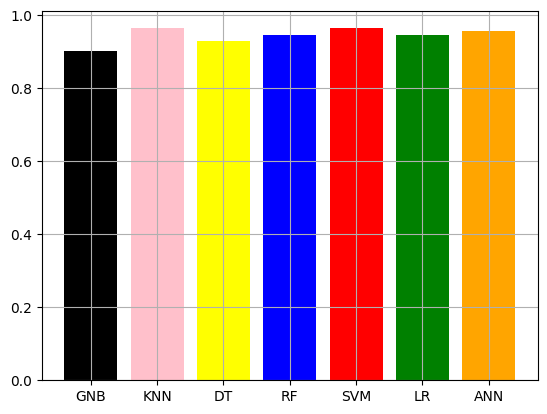

In [167]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr,acc_test_ann ]
title = ["GNB", "KNN", "DT","RF", "SVM", "LR","ANN"]
colors = ['black','pink','yellow','blue', 'red','green','orange']
plt.bar(title, acc_test, color = colors)
plt.grid()
plt.show()

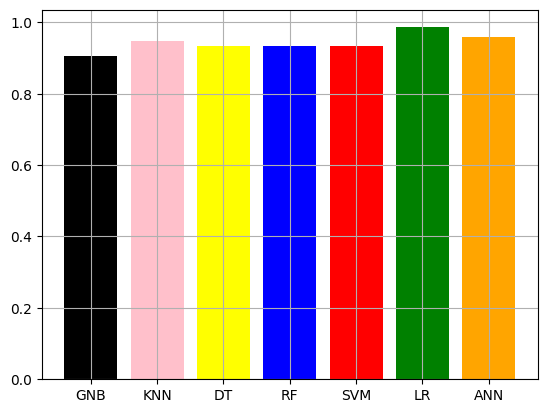

In [ ]:
p = [p_gnb, p_knn,p_dt, p_rf, p_svm, p_lr,p_ann ]
title = ["GNB", "KNN", "DT","RF", "SVM", "LR","ANN"]
colors = ['black','pink','yellow','blue', 'red','green','orange']
plt.bar(title, p, color = colors)
plt.grid()
plt.show()

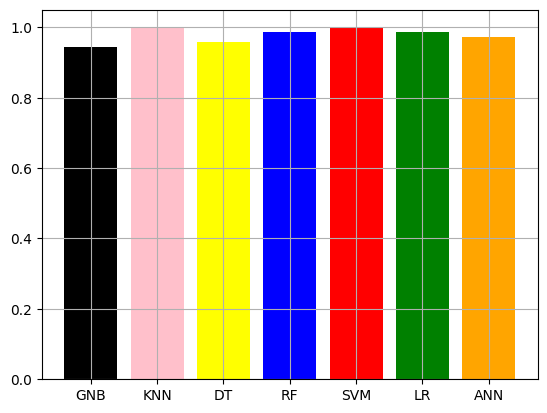

In [170]:
r = [r_gnb, r_knn,r_dt,r_rf, r_svm,r_lr,r_ann ]
title = ["GNB", "KNN", "DT","RF", "SVM", "LR","ANN"]
colors = ['black','pink','yellow','blue', 'red','green','orange']
plt.bar(title, r, color = colors)
plt.grid()
plt.show()
